# Test file

In [1]:
from __future__ import division, print_function # Makes division and printing work like python 3 (we're using 2)
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from tabulate import tabulate
import csv
%matplotlib inline
from numpy import arange, sin, pi, cos
from scipy.fftpack import fft, dct

In [16]:
check_words = np.loadtxt("GloVeTwitter27B/25d.txt", usecols=range(0, 1), dtype = "string")

check_vectors = np.loadtxt("GloVeTwitter27B/25d.txt", usecols=range(1, 26), dtype = "float")

In [45]:
#motion_data = np.loadtxt("Adam_06_n.rov", skiprows=16, usecols=range(0, 6))
time_intervals = np.loadtxt("WordTables/Adam_06_n", usecols=range(4, 6), dtype="int")
words = np.loadtxt("WordTables/Adam_06_n", usecols=range(3, 4), dtype="string")

In [21]:
# Load pre-trained Twitter data into a dictionary
check_table = {}
for i in range(check_words.size):
    check_table[check_words[i]] = check_vectors[i]

In [50]:
for index, word in enumerate(words):
    words[index] = word.lower()

In [63]:
trail_d = np.load('emnist-test.npz')
trail_d['inputs'].shape

(15800, 28, 28)

In [52]:
check_table['hello']

array([-0.77069  ,  0.12827  ,  0.33137  ,  0.0050893, -0.47605  ,
       -0.50116  ,  1.858    ,  1.0624   , -0.56511  ,  0.13328  ,
       -0.41918  , -0.14195  , -2.8555   , -0.57131  , -0.13418  ,
       -0.44922  ,  0.48591  , -0.6479   , -0.84238  ,  0.61669  ,
       -0.19824  , -0.57967  , -0.65885  ,  0.43928  , -0.50473  ])

In [46]:
#print(motion_data.shape)
print(time_intervals.shape)
print(words.shape)

(536, 2)
(536,)


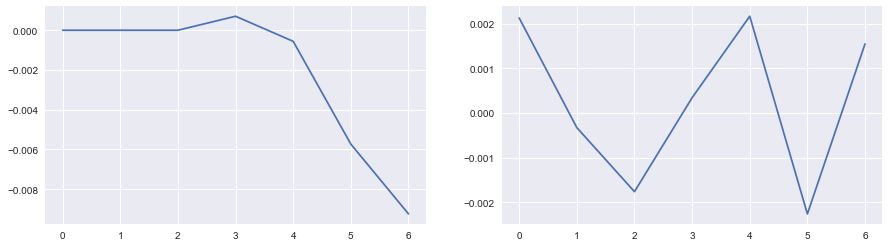

In [108]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))
ax1.plot(motion_data[0:7, 0:1])
ax2.plot(dct(np.array([0., 0., 0., 0.000704078, 0.000545926, -0.000558843, 0.000749222]), 1))
plt.show()

30


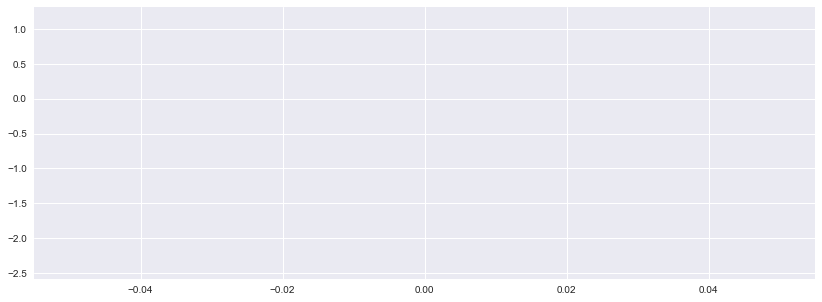

In [107]:
motion_1 = np.array(motion_data[:30, 0:1].reshape(1, 30))
print(motion_1.size)
dct_trans = dct(motion_1, 1)

plt.figure(figsize=(14,5))
t = np.arange(30).reshape(1,30)
plt.plot(dct_trans)
plt.show()
#print(dct_trans)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))
ax1.plot(motion_data[0:7, 0:1])
ax2.plot(dct(np.array([0., 0., 0., 0.000704078, 0.000545926, -0.000558843, 0.000749222]), 1))
plt.show()

In [ ]:
# auto encoder, RNN, langugae translation, LSTM

26
23
10
37
11
28
8
40
40
24


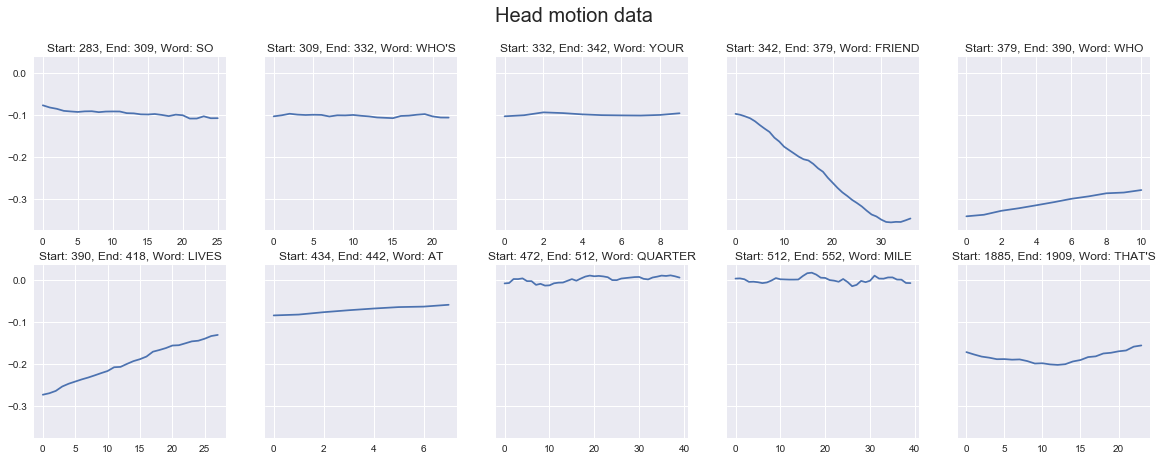

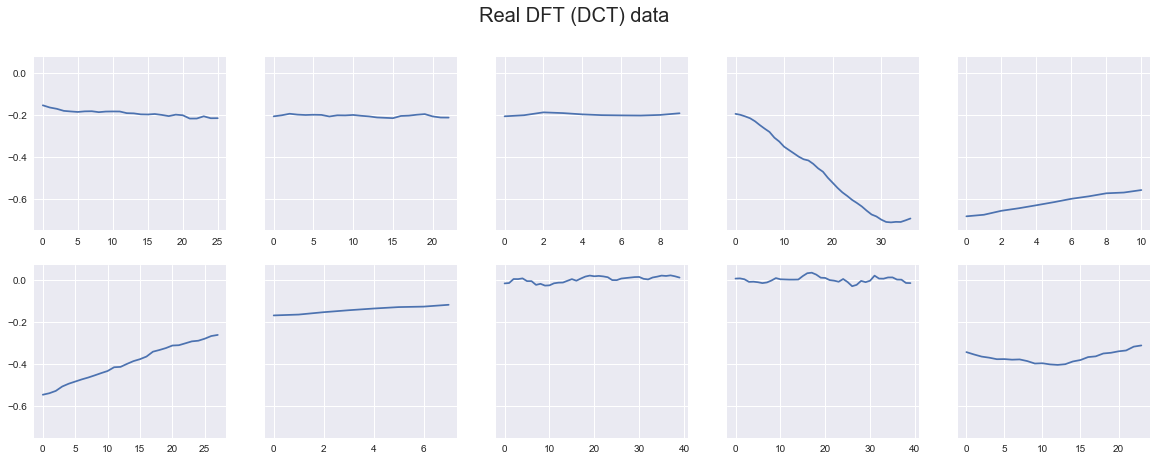

In [13]:
timestep = 1
f, axarr = plt.subplots(2, 5, figsize=(20,7), sharey=True)
f_dct, axarr_dct = plt.subplots(2, 5, figsize=(20,7), sharey=True)

for i, t in enumerate(time_intervals[0:10]):
    start_time = t[0]
    end_time = t[1]
    motions = motion_data[start_time:end_time, 0:1]
    axarr[int(i//5), int(i%5)].plot(motions)
    axarr[int(i//5), int(i%5)].set_title("Start: {0}, End: {1}, Word: {2}".format(start_time, end_time, words[i]))
    f.suptitle("Head motion data", fontsize=20)
    
    print(motions.size)
    t = arange(start_time, end_time, timestep)
    #freq = dct(t.shape[-1], d=timestep)
    cos_trans = dct(motions)
    axarr_dct[int(i//5), int(i%5)].plot(cos_trans)
    f_dct.suptitle("Real DFT (DCT) data", fontsize=20)

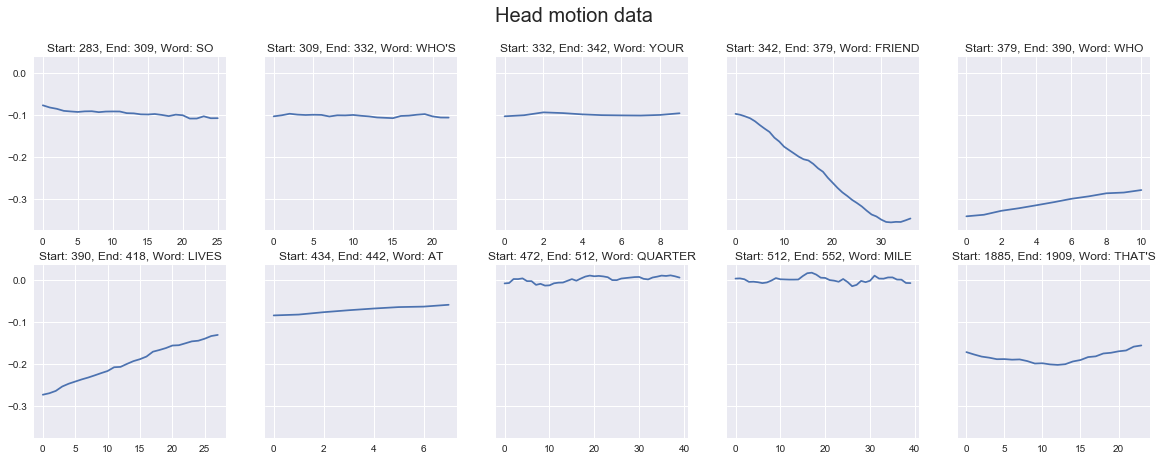

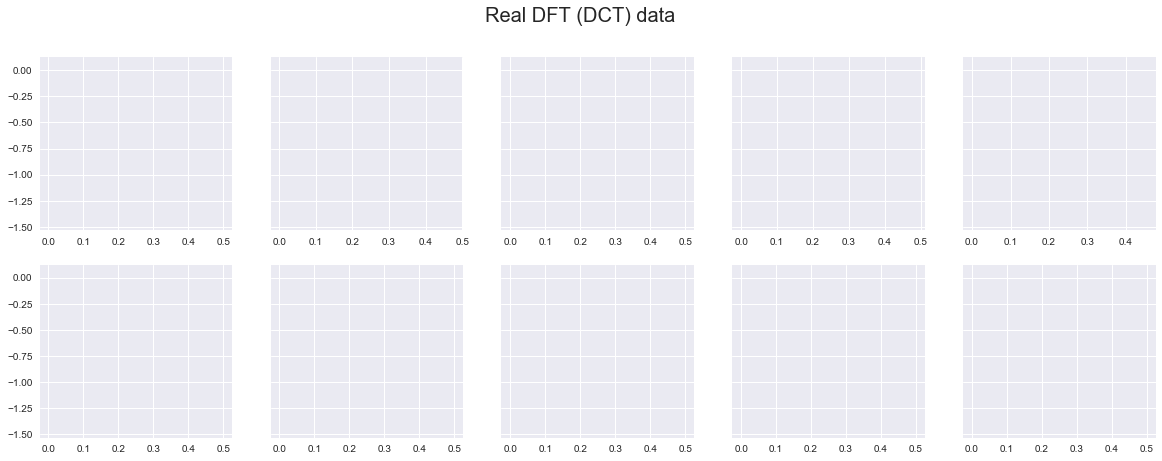

In [94]:
timestep = 1
f, axarr = plt.subplots(2, 5, figsize=(20,7), sharey=True)
f_dft, axarr_dft = plt.subplots(2, 5, figsize=(20,7), sharey=True)

for i, t in enumerate(time_intervals[0:10]):
    start_time = t[0]
    end_time = t[1]
    motions = motion_data[start_time:end_time, 0:1]
    axarr[int(i//5), int(i%5)].plot(motions)
    axarr[int(i//5), int(i%5)].set_title("Start: {0}, End: {1}, Word: {2}".format(start_time, end_time, words[i]))
    f.suptitle("Head motion data", fontsize=20)
    
    t = arange(start_time, end_time, timestep)
    freq = np.fft.rfftfreq(t.shape[-1], d=timestep)
    rfft = np.fft.rfft(motions.reshape(1, motions.size), norm="ortho")
    axarr_dft[int(i//5), int(i%5)].plot(freq.reshape(1, freq.size), rfft)
    f_dft.suptitle("Real DFT (DCT) data", fontsize=20)

1th iteration with 100 points
Amp: 5.0, index: 1
Positive frequency range: 50.0

2th iteration with 200 points
Amp: 7.07106781187, index: 2
Positive frequency range: 100.0

3th iteration with 300 points
Amp: 8.66025403784, index: 3
Positive frequency range: 150.0

4th iteration with 400 points
Amp: 10.0, index: 4
Positive frequency range: 200.0



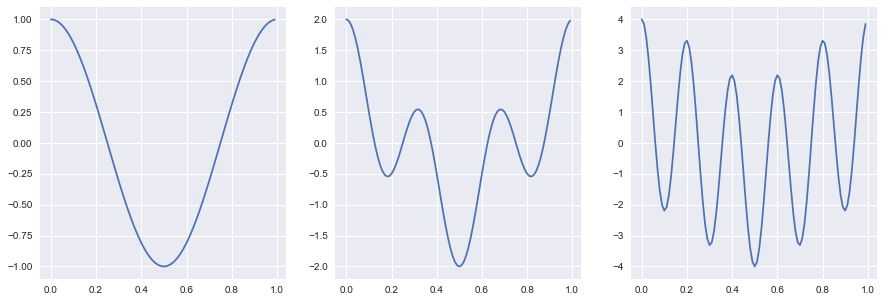

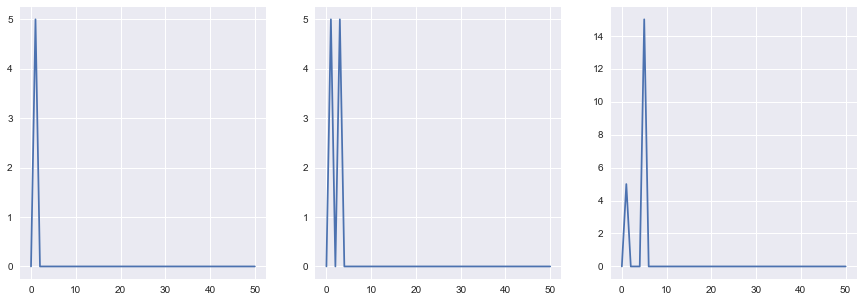

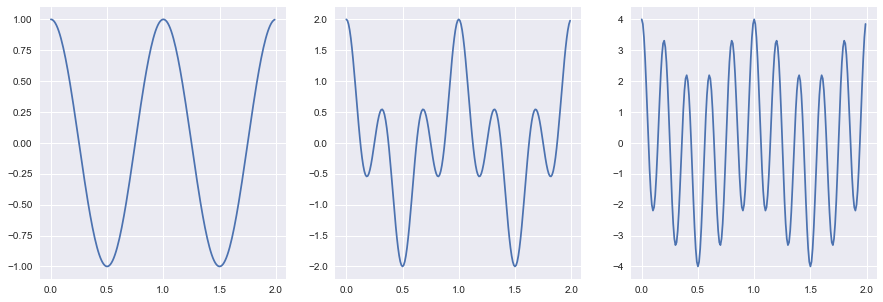

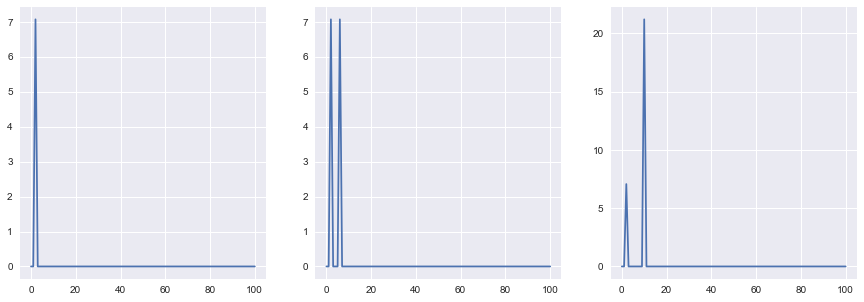

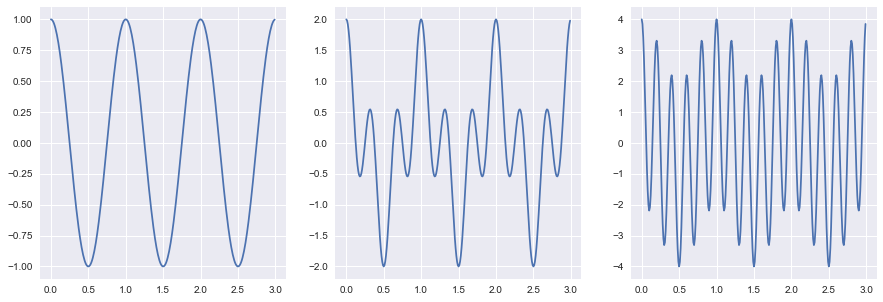

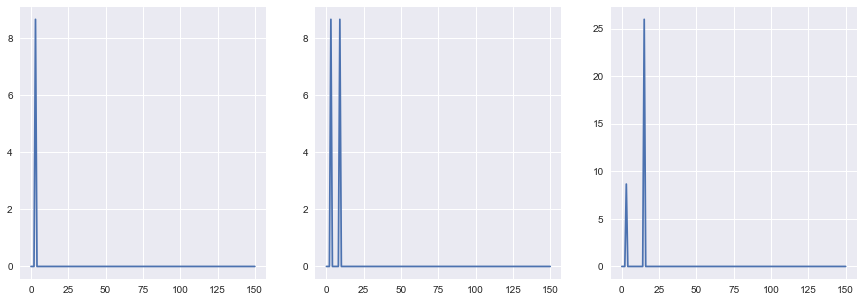

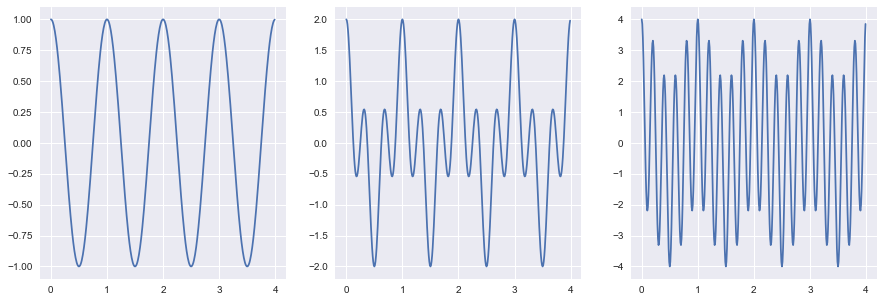

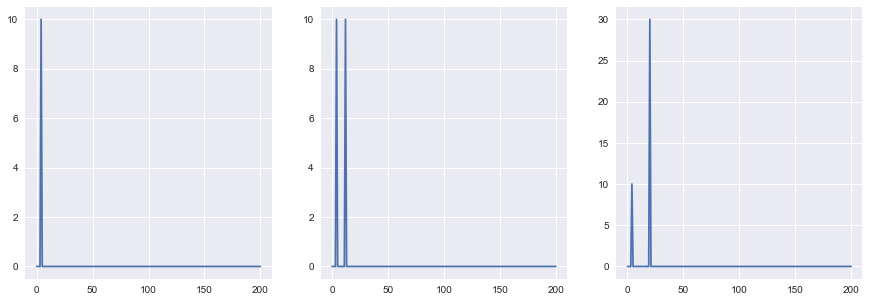

In [133]:
amp = []
for t_range in range(1,5):
    timestep = 0.01
    t = arange(0.0, t_range, timestep)
    func_1 = np.cos(2*pi*t)
    func_2 = np.cos(2*pi*t)+ np.cos(2*pi*3*t)
    func_3 = np.cos(2*pi*t)+ 3*np.cos(2*pi*5*t)

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    ax1.plot(t, func_1)
    ax2.plot(t, func_2)
    ax3.plot(t, func_3)
    
    freq = np.fft.rfftfreq(t.shape[-1], d=timestep)

    rfft_1 = np.fft.rfft(func_1, norm="ortho")
    rfft_2 = np.fft.rfft(func_2, norm="ortho")
    rfft_3 = np.fft.rfft(func_3, norm="ortho")

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    ax1.plot(rfft_1)
    ax2.plot(rfft_2)
    ax3.plot(rfft_3)
    
    for index, i in enumerate(rfft_1.real):
        if i >= 0.1:
            print("{0}th iteration with {1} points". format(t_range, t_range*100))
            print("Amp: {0}, index: {1}".format(i, index))
            print("Positive frequency range: {0}".format(t_range*100/2) + "\n")
            amp.append(i)
# plt.plot(range(1,10), amp)

In [87]:
#print(rfft_2.real)

print("rfft_2 shape:" + str(rfft_2.shape))
print("t shape:" + str(t.shape[-1]))
print("freq shape:" + str(freq.shape))

for index, i in enumerate(rfft_2.real):
    if i/100 >= 0.1:
        print("{0} {1}".format(i, index))

rfft_2 shape:(51,)
t shape:100
freq shape:(51,)
50.0 1
50.0 3
